# KNN Classification with Bagging


KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

KNN has the following basic steps:

1. Calculate distance
2. Find closest neighbors
3. Vote for labels

### TOPIC:
  KNN on Red Wine Dataset obtained from Kaggle
  

### OBJECTIVE:

1) Perform Pre-processing on Red Wine dataset.

2) Perform KNN with Bagging Red wine dataset.

3) Predict Quality of Red wine for test dataset with better accuracy.

4) Illustrate different measures of performance

### DATASET SELECTION :

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

### DEFINITION OF DATASET : 

The Red wine dataset is both a classification and regression problem.
#### Features:
1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide

7 - total sulfur dioxide 

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

#### Target Variable :
quality (score between 0 and 10) 

#### Classification : 
   According to the quality value of the wine(0-10), the dataset will be classified into 0 & 1(Good and Bad).
   This conversion will be done in the Pre-processing section.
   


#### Importing libraries:


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import precision_score,f1_score, recall_score, confusion_matrix,accuracy_score
from scipy import stats
import pickle

#### Reading Dataset

In [3]:
#Reading dataset 
wine = pd.read_csv('C:\\Users\\Lenovo-Pc\\Desktop\\Acadgild\\\Kaggle\\red-wine-quality-cortez-et-al-2009\\winequality-red.csv')


## PRE-PROCESSING:

### 1) Finding Null Values:

In [3]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### OBSERVATION:  
There are no missing values in this dataset

### 2) Encoding:

#### 2.1.) The target variable is transformed into a categorical variable with values - good and bad
   
   2 < quality < 6.5 - bad
   
   6.5 < quality < 8 - good

In [4]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


#### 2.2) Categorical variables are changed into 0 and 1.

good - 0

bad  - 1

In [5]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 3. Finding Outliers

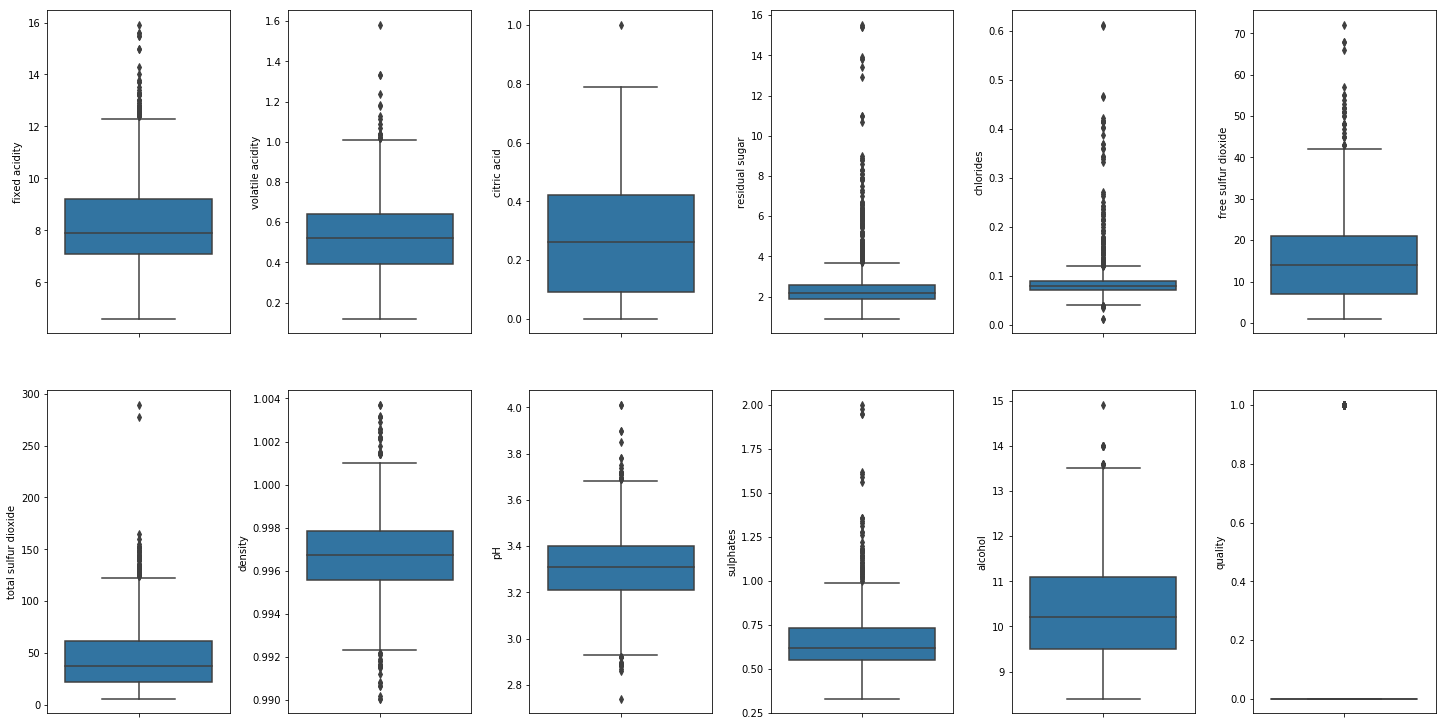

In [6]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in wine.items():
    sns.boxplot(y=k, data=wine, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Removing outliers using z-score method

In [8]:
print(wine.shape)
z = np.abs(stats.zscore(wine))
print(z)
wine= wine[(z < 3).all(axis=1)]
print(wine.shape)

(1458, 12)
[[0.55404532 1.0387081  1.38741253 ... 0.63538217 0.99657302 0.39988065]
 [0.31118983 2.10132549 1.38741253 ... 0.2897715  0.60491468 0.39988065]
 [0.31118983 1.39291389 1.17821377 ... 0.05848308 0.60491468 0.39988065]
 ...
 [1.22189791 0.0829436  0.70751654 ... 0.82944447 0.57006031 0.39988065]
 [1.4647534  0.71401945 0.75981623 ... 0.52105991 0.21325635 0.39988065]
 [1.40403953 1.26362959 1.07067297 ... 0.13557922 0.57006031 0.39988065]]
(1327, 12)


### 4. Feature selection

In [9]:
# X -feature variables, y - target variable
X = wine.drop('quality', axis = 1)
y = wine['quality']



###  Building Model

In [10]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature scaling

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### KNN Classifier


In [20]:
acc_dict={}
k_list=[]

for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    acc_dict[K_value] = accuracy_score(y_test,y_pred)*100
    


Accuracy is  89.84962406015038 % for K-Value: 1
Accuracy is  90.22556390977444 % for K-Value: 2
Accuracy is  90.6015037593985 % for K-Value: 3
Accuracy is  90.97744360902256 % for K-Value: 4
Accuracy is  90.22556390977444 % for K-Value: 5
Accuracy is  88.7218045112782 % for K-Value: 6
Accuracy is  88.7218045112782 % for K-Value: 7
Accuracy is  89.47368421052632 % for K-Value: 8
Accuracy is  89.47368421052632 % for K-Value: 9
Accuracy is  90.6015037593985 % for K-Value: 10
Accuracy is  90.22556390977444 % for K-Value: 11
Accuracy is  90.22556390977444 % for K-Value: 12
Accuracy is  90.22556390977444 % for K-Value: 13
Accuracy is  91.35338345864662 % for K-Value: 14
Accuracy is  90.97744360902256 % for K-Value: 15
Accuracy is  90.6015037593985 % for K-Value: 16
Accuracy is  90.6015037593985 % for K-Value: 17
Accuracy is  90.6015037593985 % for K-Value: 18
Accuracy is  90.22556390977444 % for K-Value: 19
Accuracy is  89.84962406015038 % for K-Value: 20
Accuracy is  90.6015037593985 % for 

In [13]:
max(acc_dict.values())


91.35338345864662

### Optimisation

### KNN with Bagging

In [14]:
from sklearn.neighbors import KNeighborsClassifier

bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=20, max_samples=0.4,
                            bootstrap=True, random_state=3) 
bag_knn.fit(X_train, y_train)
y_pred = bag_knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9172932330827067


#### Saving Model

In [24]:
filename = 'knn_bagging.sav'
pickle.dump(bag_knn, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)
y_pred = loaded_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.4, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=3, verbose=0, warm_start=False)
Accuracy: 0.92


### Performance measure

#### Accuracy score:

In [25]:
print(accuracy_score(y_test, y_pred))

0.9172932330827067


#### Confusion Matrix

In [16]:
confusion_matrix(y_test, y_pred)


array([[232,   6],
       [ 16,  12]], dtype=int64)

Accuracy = TP+TN / total

         = 232+12 / 292
         
         = 0.917

Misclassification rate  = FP+FN / total

                        =  16 + 6 /292
                        
                        =  0.08

False Positive Rate = FP/actual no
                    
                    = 6/ 238
                    
                    = 0.02

True Positive Rate = TP / actual yes

                   = 12/ 28
    
                   = 0.43

#### Precision
Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.
Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

Precision = True Positive / (True Positive + False Positive)

In [17]:
print(precision_score(y_test, y_pred) )

0.6666666666666666


#### Recall

Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

Recall = True Positive / (True Positive + False Negative)

In [18]:
print(recall_score(y_test, y_pred) )

0.42857142857142855


#### F1 score

F1 Score is needed when you want to seek a balance between Precision and Recall.

F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [19]:
print(f1_score(y_test, y_pred) )

0.5217391304347826


### Conclusion: 

1. The KNN Classifier was modelled and highest accuracy was found for K-value 23 : 91%
2. The accuracy with bagging was found to be 92% with K-value 5 : 92%

### Pros and Cons:

Pros:

1. No assumptions about data — useful, for example, for nonlinear data

2. Simple algorithm — to explain and understand/interpret

3. High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models

4. Versatile — useful for classification or regression

Cons:

1. Computationally expensive — because the algorithm stores all of the training data

2. High memory requirement

3. Stores all (or almost all) of the training data

4. Prediction stage might be slow (with big N)
